# 신용카드_이상거래_예측분석
- https://www.kaggle.com/datasets/youssefismail20/fraudsynth-credit-fraud-detection-dataset

### 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

### 데이터 불러오기 및 확인

In [4]:
data = pd.read_csv('./data/fraud_detection_dataset.csv')
data.head()

,timestamp,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
0,2023-12-15 02:48:24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655
1,2023-10-30 11:08:37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395
2,2023-11-21 05:19:35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496
3,2023-11-07 00:03:25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612
4,2023-04-02 14:12:23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     object 
 1   user_id       object 
 2   amount        float64
 3   location      object 
 4   device_type   object 
 5   is_fraud      int64  
 6   age           int64  
 7   income        float64
 8   debt          float64
 9   credit_score  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 152.6+ MB


### 컬럼 확인
- timestamp : 거래일자
- user_id : 고객ID
- amount : 총거래금액
- location : 거래발생위치(도시)
- device_type : 거래발생기기
- is_fraud : 이상거래여부
- age : 고객나이
- income : 고객수입
- debt : 고객추정빚
- credit_score : 고객신용점수

In [9]:
data.describe()

,amount,is_fraud,age,income,debt,credit_score
count,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00
mean,1751.68,0.50,44.00,85020.99,24984.04,574.79
std,1504.16,0.50,15.30,37532.01,14440.05,159.12
min,10.00,0.00,18.00,20000.09,0.04,300.00
25%,504.34,0.00,31.00,52530.58,12465.51,437.00
50%,1000.00,0.50,44.00,85032.87,24980.93,575.00
75%,2996.71,1.00,57.00,117537.45,37480.29,713.00
max,4999.99,1.00,70.00,149999.96,49999.98,850.00


### 결측치 확인/처리 및 중복값 처리

In [10]:
data.isna().sum()

timestamp       0
user_id         0
amount          0
location        0
device_type     0
is_fraud        0
age             0
income          0
debt            0
credit_score    0
dtype: int64

In [11]:
# 중복값 확인
len(data[data.duplicated()])

0

### 이상치 탐지 및 처리

In [12]:
data_num = data.select_dtypes(exclude='object')
data_num.columns

Index(['amount', 'is_fraud', 'age', 'income', 'debt', 'credit_score'], dtype='object')

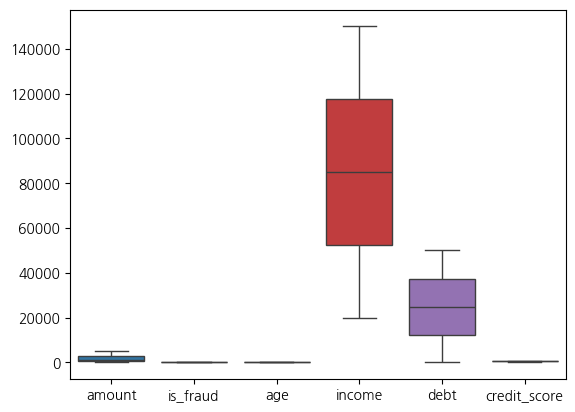

In [18]:
# 박스 플롯 확인
# 이상치가 없음을 확인
sns.boxplot(data_num)
plt.show()

### EDA(탐색적 데이터 분석)

In [7]:
# 컬럼 데이터 구성 확인
data_obj = data.select_dtypes(include='object')

In [13]:
print(data_num.columns)
print(data_obj.columns)

Index(['amount', 'is_fraud', 'age', 'income', 'debt', 'credit_score'], dtype='object')
Index(['timestamp', 'user_id', 'location', 'device_type'], dtype='object')


In [53]:
# 문자형 데이터 확인
for col in data_obj:
#     print(col)
    print('='*30, col, '='*30)
    print(f"{col}의 unique 값의 수 = {data_obj[col].nunique()}", end='\n')
    print(data_obj[col].value_counts())
    
    print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False))
    print()
    

============================== timestamp ==============================
timestamp의 unique 값의 수 = 1937890
timestamp
2023-08-27 19:23:20    4
2024-02-11 09:02:19    4
2023-10-10 10:45:13    4
2024-02-19 02:24:12    4
2023-05-10 03:12:02    4
                      ..
2023-07-09 01:04:02    1
2023-10-07 05:25:05    1
2023-06-11 04:03:04    1
2023-10-08 12:55:25    1
2024-02-16 02:50:25    1
Name: count, Length: 1937890, dtype: int64
                     is_fraud
timestamp                    
2024-02-29 20:10:41      1.00
2024-02-29 20:07:02      1.00
2024-02-29 20:07:18      1.00
2024-02-29 20:07:26      1.00
2024-02-29 20:07:52      1.00
...                       ...
2024-02-29 19:50:12      0.00
2024-02-29 19:50:17      0.00
2024-02-29 19:59:21      0.00
2024-02-29 19:59:41      0.00
2023-03-01 14:38:04      0.00

[1937890 rows x 1 columns]
============================== user_id ==============================
user_id의 unique 값의 수 = 2000000
user_id
bf08a2c2-3e8f-464b-92fb-cfd94bee1b34    

### location, device_type 이 유의한 컬럼이라고 생각
- location은 바로 인코딩하는 경우 10만개 이상의 컬럼이 생성
- 상위 50개 지역과 나머지는 others로 묶어서 처리
- device_type은 바로 인코딩해도 문제 없음

In [62]:
# 숫자형 데이터 확인
for col in data_num:
#     print(col)
    print('='*30, col, '='*30)
    print(f"{data_num[col].describe()}", end='\n\n')
    
#     sns.histplot(data_num[col])
#     plt.show()
#     print('\n\n')
    
    if col != 'is_fraud':
        print(data[[col, 'is_fraud']].groupby(col).mean().sort_values(by='is_fraud', ascending=False))
    print()
    

============================== amount ==============================
count   2000000.00
mean       1751.68
std        1504.16
min          10.00
25%         504.34
50%        1000.00
75%        2996.71
max        4999.99
Name: amount, dtype: float64

         is_fraud
amount           
4999.99      1.00
4999.98      1.00
4999.97      1.00
4999.96      1.00
4999.94      1.00
...           ...
10.31        0.00
10.32        0.00
10.33        0.00
10.34        0.00
10.35        0.00

[466189 rows x 1 columns]

============================== is_fraud ==============================
count   2000000.00
mean          0.50
std           0.50
min           0.00
25%           0.00
50%           0.50
75%           1.00
max           1.00
Name: is_fraud, dtype: float64


============================== age ==============================
count   2000000.00
mean         44.00
std          15.30
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: age, dt

<Axes: >

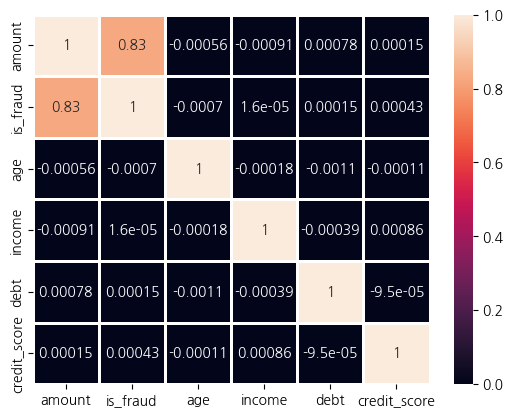

In [26]:
# 각 컬럼의 연관성 확인
sns.heatmap(data_num.corr(), annot=True, linewidth=1)

### is_fraud(종속변수)와 연관성이 있는 컬럼은 amount만 의미 있음

In [46]:
# location의 데이터를 구분
loc_value = data['location'].value_counts()
loc_value[loc_value >= 1000]

location
East Michael         1713
Lake Michael         1702
New Michael          1626
Port Michael         1624
West Michael         1604
North Michael        1601
South Michael        1579
North David          1181
Michaelmouth         1177
Lake David           1158
Smithmouth           1118
Port David           1117
Port Jennifer        1114
South David          1104
East David           1102
West David           1088
New David            1085
West Jennifer        1084
West James           1083
Lake John            1083
South Jennifer       1080
West John            1079
Lake James           1067
North James          1066
East James           1062
South John           1058
North Christopher    1051
East John            1041
South James          1041
Lake Jennifer        1039
New James            1038
Port John            1033
West Christopher     1033
North John           1026
East Jennifer        1024
New John             1012
New Jennifer         1010
Port James           1009
Sou

In [48]:
# location 컬럼 데이터 변환
loc_value = data['location'].value_counts()

# 조건에 맞으면 변환
data['location'] = data['location'].apply(lambda x:x if loc_value[x] >= 1000 else 'Others')
data['location'].nunique()

40

In [49]:
data.columns

Index(['timestamp', 'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score'],
      dtype='object')

In [52]:
# 원핫인코딩 진행
data_use = data.drop(['timestamp', 'user_id'], axis=1)

# 원핫인코딩 적용
data_use = pd.get_dummies(data_use, drop_first=True)